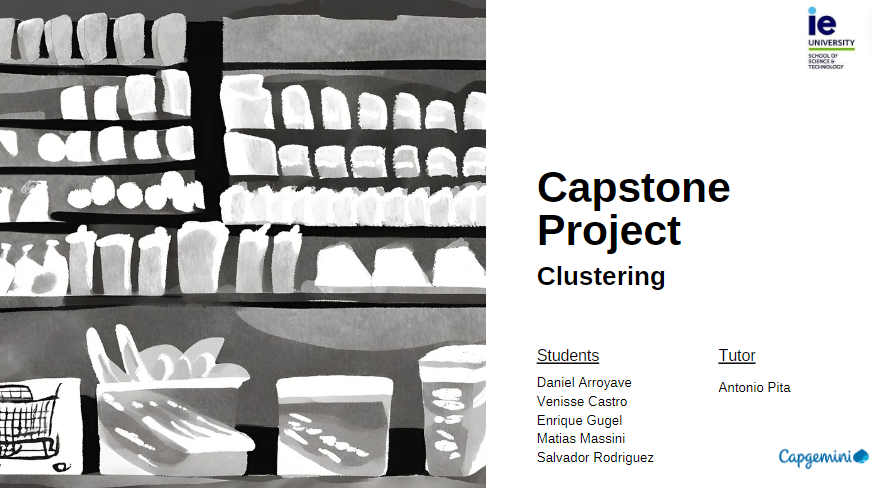

The purpose of this notebook is to obtain the best clusters to distribute the orders and to include them into the final dataset to develop our recommendation tool.

# **1.   Libraries to be imported**



In [ ]:
import os
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import KFold

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# **2.   Import Data**

We will create a Dataframe with each of the excel files providede by Capgemini



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


<mark>**IMPORTANT: Update the route the access the csv's**<mark>

* Route is the path to access the original csv's
* Destination is the path to save the datasets

In [ ]:
# Update the route to access the data:
#route = '/content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/df_merged_version.csv'
#destination = '/content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/'

#in case you accessing the google shared drive use this and discard the previous by adding a # before and deleting the # in the next line:
route = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/df_merged_version.csv'
destination = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged'

In [ ]:
# Path to the CSV file
file_path = route

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head(5)


,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS


# 3. Clusters

In [ ]:
clusters = df.copy()

In [ ]:
clusters = clusters.pivot_table(index='id_orden', columns='pasillo', values='id_producto', aggfunc='count', fill_value=0)

In [ ]:
clusters.head(8)

pasillo,ACCESORIOS PARA BEBÉS,ACEITES VINAGRES,ACEITUNAS ENCURTIDAS BIENES,ADEREZOS PARA ENSALADAS Y CONDIMENTOS,ALERGIAS GRIPE,ALIMENTOS DE LA INDIA,ALIMENTOS INSTANTÁNEOS,ALIMENTOS KOSHER,ALIMENTOS LATINOS,ALIVIO DEL DOLOR,...,SUPLEMENTOS DE VITAMINAS,SUSTITUTOS DE ALIMENTOS DE PROTEÍNAS,TÉ,UTENSILIOS DE COCINA,VEGETALES FRESCOS,VEGETARIANA VEGANA CONGELADA,VERDURAS EN CONSERVA Y EN FRASCOS,VINOS BLANCOS,VINOS TINTOS,YOGUR
id_orden,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
38,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
98,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,2,0,0,1
112,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
clusters.index.nunique()

131153

## Number of Clusters

In [ ]:
n_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters, random_state=42)

kmeans.fit(clusters)

clusters['cluster'] = kmeans.labels_

centroides = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
info_pasillo_por_cluster = clusters.groupby('cluster').mean()

info_pasillo_por_cluster = info_pasillo_por_cluster.T

info_pasillo_por_cluster

cluster,0,1,2,3
pasillo,,,,
ACCESORIOS PARA BEBÉS,0.001826,0.003363,0.003305,0.002333
ACEITES VINAGRES,0.056427,0.185901,0.089057,0.121277
ACEITUNAS ENCURTIDAS BIENES,0.024290,0.083343,0.043329,0.057505
ADEREZOS PARA ENSALADAS Y CONDIMENTOS,0.025735,0.062447,0.045140,0.052518
ALERGIAS GRIPE,0.012931,0.005044,0.007244,0.005398
...,...,...,...,...
VEGETARIANA VEGANA CONGELADA,0.027459,0.062327,0.043102,0.044513
VERDURAS EN CONSERVA Y EN FRASCOS,0.049594,0.285697,0.098655,0.192141
VINOS BLANCOS,0.010687,0.002042,0.004799,0.005581


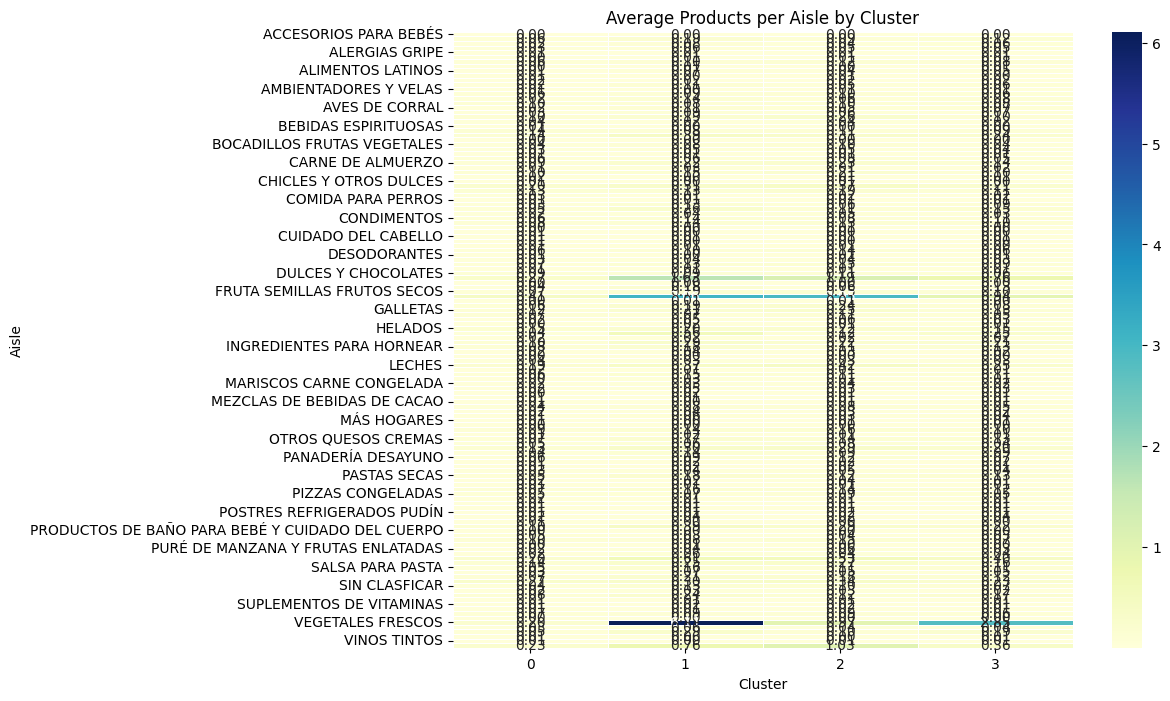

In [ ]:

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(info_pasillo_por_cluster, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)

# Add title and labels
plt.title('Average Products per Aisle by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Aisle')

# Show the heatmap
plt.show()

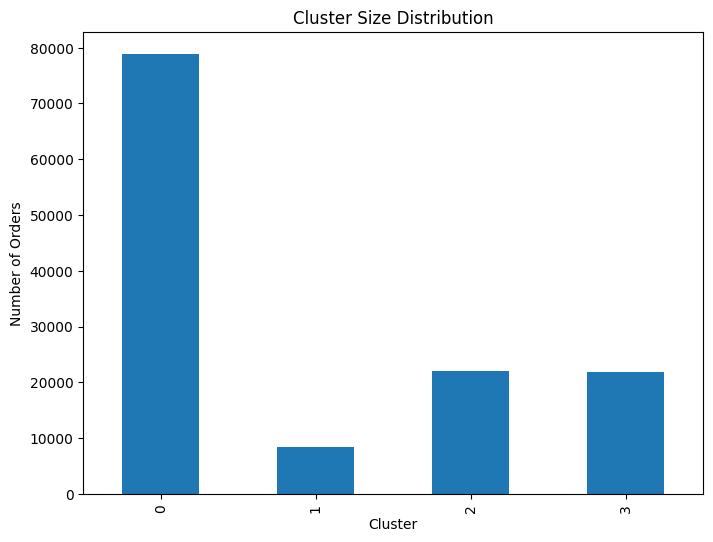

In [ ]:
# Plot the distribution of cluster sizes
plt.figure(figsize=(8, 6))
clusters['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Orders')
plt.show()

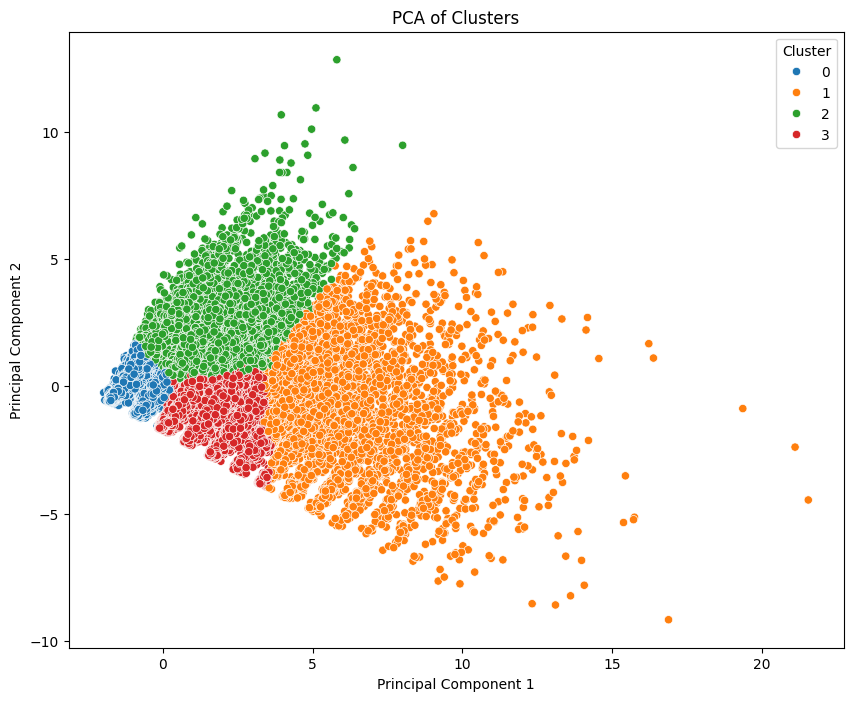

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clusters.drop('cluster', axis=1))

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters['cluster'].values

# Plot the PCA components with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Get the loadings (coefficients of the principal components)
loadings = pca.components_.T

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=clusters.drop('cluster', axis=1).columns)

# Display the loadings
loadings_df

,PC1,PC2
pasillo,,
ACCESORIOS PARA BEBÉS,0.000353,0.000528
ACEITES VINAGRES,0.020445,-0.008629
ACEITUNAS ENCURTIDAS BIENES,0.009940,-0.002275
ADEREZOS PARA ENSALADAS Y CONDIMENTOS,0.007402,0.000036
ALERGIAS GRIPE,-0.001786,-0.000603
...,...,...
VEGETARIANA VEGANA CONGELADA,0.006391,0.001338
VERDURAS EN CONSERVA Y EN FRASCOS,0.037873,-0.021319
VINOS BLANCOS,-0.001640,-0.001337


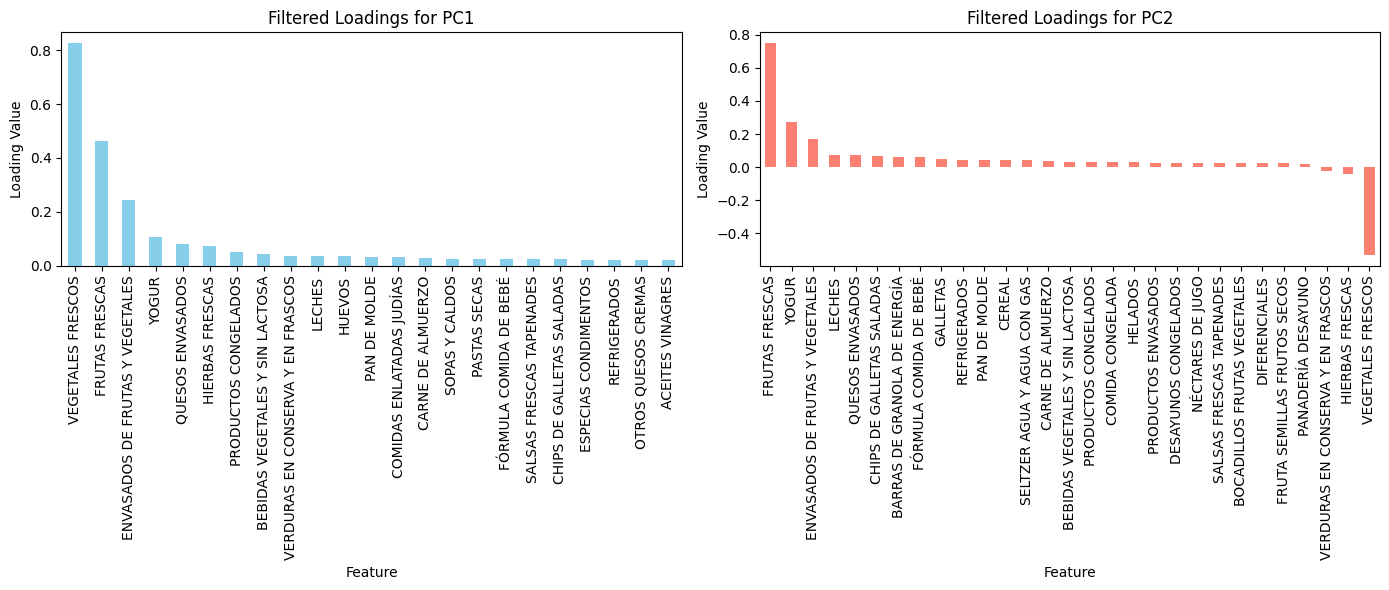

In [ ]:
#Filter the loadings to include only those greater than 0.1 or less than -0.1
filtered_loadings_PC1 = loadings_df[(loadings_df['PC1'] > 0.02) | (loadings_df['PC1'] < -0.02)]
filtered_loadings_PC2 = loadings_df[(loadings_df['PC2'] > 0.02) | (loadings_df['PC2'] < -0.02)]

# Plot the filtered loadings for PC1 and PC2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
filtered_loadings_PC1['PC1'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Filtered Loadings for PC1')
plt.ylabel('Loading Value')
plt.xlabel('Feature')

plt.subplot(1, 2, 2)
filtered_loadings_PC2['PC2'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Filtered Loadings for PC2')
plt.ylabel('Loading Value')
plt.xlabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for each cluster
cluster_profiles = clusters.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Display the cluster profiles
cluster_profiles

pasillo ACCESORIOS PARA BEBÉS                          ACEITES VINAGRES  \
                         mean median       std min max             mean   
cluster                                                                   
0                    0.001826    0.0  0.043278   0   2         0.056427   
1                    0.003363    0.0  0.057893   0   1         0.185901   
2                    0.003305    0.0  0.057396   0   1         0.089057   
3                    0.002333    0.0  0.049186   0   2         0.121277   

pasillo                           ... VINOS TINTOS                           \
        median       std min max  ...         mean median       std min max   
cluster                           ...                                         
0          0.0  0.257147   0   6  ...     0.011968    0.0  0.146923   0   9   
1          0.0  0.476725   0   5  ...     0.003843    0.0  0.083375   0   4   
2          0.0  0.326875   0   5  ...     0.005071    0.0  0.093585   0   4   
3          0.0  0.371181   0   4  ...     0.006176    0.0  0.101270   0   4   

pasillo     YOGUR                           
             mean median       std min max  
cluster                                     
0        0.232860    0.0  0.638771   0   8  
1        0.762580    0.0  1.151799   0  10  
2        1.026531    1.0  1.520908   0  26  
3        0.358113    0.0  0.744231   0  10  

[4 rows x 670 columns]

In [ ]:
# Calculate the total number of products per order
clusters['total_products'] = clusters.drop('cluster', axis=1).sum(axis=1)

# Group by cluster and calculate the mean of total products
mean_total_products_per_cluster = clusters.groupby('cluster')['total_products'].mean()

# Display the results
mean_total_products_per_cluster

cluster
0     6.768281
1    23.302990
2    16.386245
3    12.802507
Name: total_products, dtype: float64

In [ ]:
def get_top_n_per_column(info_pasillo_por_cluster, top_n=4):
    top_n_dict = {}
    for column in info_pasillo_por_cluster.columns:
        sorted_column = info_pasillo_por_cluster[column].sort_values(ascending=False).head(top_n)
        top_n_dict[column] = sorted_column
    return top_n_dict

# Get the top 4 values for each column
top_4_per_column = get_top_n_per_column(info_pasillo_por_cluster, top_n=4)

# Display the top 4 values for each column
for column, top_values in top_4_per_column.items():
    print(f"Top 4 values for {column}:\n{top_values}\n")

Top 4 values for 0:
pasillo
FRUTAS FRESCAS                       0.406960
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.272401
SELTZER AGUA Y AGUA CON GAS          0.271691
YOGUR                                0.232860
Name: 0, dtype: float64

Top 4 values for 1:
pasillo
VEGETALES FRESCOS                    6.110124
FRUTAS FRESCAS                       3.063889
ENVASADOS ​​DE FRUTAS Y VEGETALES    1.632881
YOGUR                                0.762580
Name: 1, dtype: float64

Top 4 values for 2:
pasillo
FRUTAS FRESCAS                       2.948295
ENVASADOS ​​DE FRUTAS Y VEGETALES    1.193960
YOGUR                                1.026531
VEGETALES FRESCOS                    0.970254
Name: 2, dtype: float64

Top 4 values for 3:
pasillo
VEGETALES FRESCOS                    2.850405
FRUTAS FRESCAS                       0.935404
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.763164
QUESOS ENVASADOS                     0.395261
Name: 3, dtype: float64



In [ ]:
clusters

pasillo,ACCESORIOS PARA BEBÉS,ACEITES VINAGRES,ACEITUNAS ENCURTIDAS BIENES,ADEREZOS PARA ENSALADAS Y CONDIMENTOS,ALERGIAS GRIPE,ALIMENTOS DE LA INDIA,ALIMENTOS INSTANTÁNEOS,ALIMENTOS KOSHER,ALIMENTOS LATINOS,ALIVIO DEL DOLOR,...,TÉ,UTENSILIOS DE COCINA,VEGETALES FRESCOS,VEGETARIANA VEGANA CONGELADA,VERDURAS EN CONSERVA Y EN FRASCOS,VINOS BLANCOS,VINOS TINTOS,YOGUR,cluster,total_products
id_orden,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,3,7
36,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,3,8
38,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,9
96,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
98,0,1,0,0,0,0,0,0,0,0,...,0,0,4,0,2,0,0,1,3,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421049,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,6
3421056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
3421058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


##  4. Analysis when the order is greater than 6 products

In [ ]:
clusters_filtered  = clusters[clusters['total_products'] > 6]
clusters_filtered

pasillo,ACCESORIOS PARA BEBÉS,ACEITES VINAGRES,ACEITUNAS ENCURTIDAS BIENES,ADEREZOS PARA ENSALADAS Y CONDIMENTOS,ALERGIAS GRIPE,ALIMENTOS DE LA INDIA,ALIMENTOS INSTANTÁNEOS,ALIMENTOS KOSHER,ALIMENTOS LATINOS,ALIVIO DEL DOLOR,...,TÉ,UTENSILIOS DE COCINA,VEGETALES FRESCOS,VEGETARIANA VEGANA CONGELADA,VERDURAS EN CONSERVA Y EN FRASCOS,VINOS BLANCOS,VINOS TINTOS,YOGUR,cluster,total_products
id_orden,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,3,7
36,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,3,8
38,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,9
96,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
98,0,1,0,0,0,0,0,0,0,0,...,0,0,4,0,2,0,0,1,3,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420895,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,2,2,16
3420909,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,2,2,10
3420996,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,11


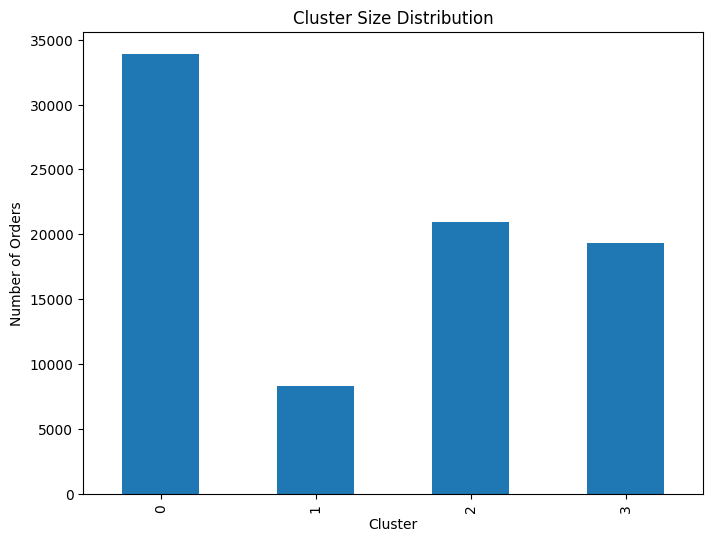

In [ ]:
# Plot the distribution of cluster sizes
plt.figure(figsize=(8, 6))
clusters_filtered['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
# Group by cluster and calculate the mean of total products
mean_total_products_per_cluster = clusters_filtered.groupby('cluster')['total_products'].mean()

# Display the results
mean_total_products_per_cluster

cluster
0    11.060366
1    23.302990
2    16.998758
3    13.835915
Name: total_products, dtype: float64

In [ ]:
clusters_filtered  = clusters_filtered.drop('total_products', axis=1)

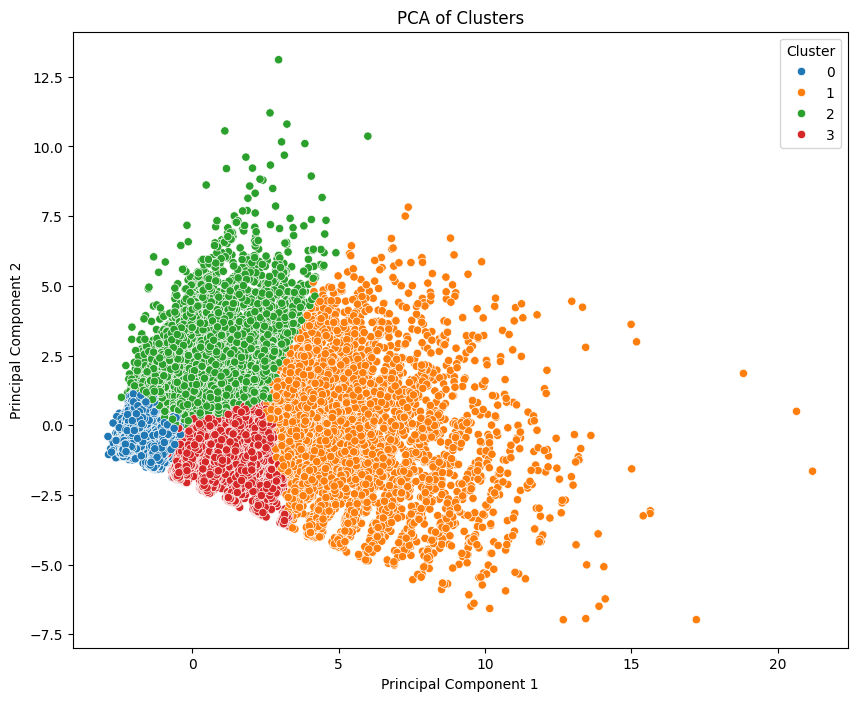

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clusters_filtered.drop('cluster', axis=1))

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters_filtered['cluster'].values

# Plot the PCA components with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Get the loadings (coefficients of the principal components)
loadings = pca.components_.T

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=clusters_filtered.drop('cluster', axis=1).columns)

# Display the loadings
loadings_df

,PC1,PC2
pasillo,,
ACCESORIOS PARA BEBÉS,0.000070,0.000453
ACEITES VINAGRES,0.017339,-0.010179
ACEITUNAS ENCURTIDAS BIENES,0.006568,-0.004736
ADEREZOS PARA ENSALADAS Y CONDIMENTOS,0.002964,-0.003348
ALERGIAS GRIPE,-0.002520,-0.001580
...,...,...
VEGETARIANA VEGANA CONGELADA,0.002104,-0.001952
VERDURAS EN CONSERVA Y EN FRASCOS,0.032698,-0.025774
VINOS BLANCOS,-0.002000,-0.001937


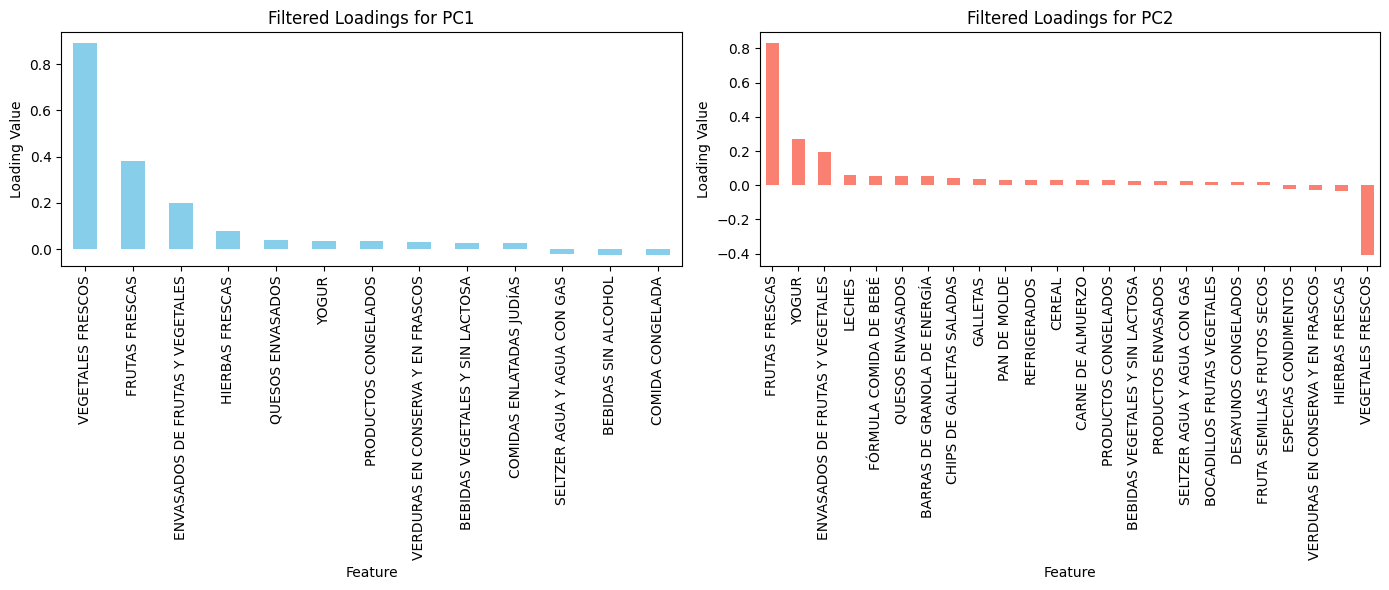

In [ ]:
#Filter the loadings to include only those greater than 0.1 or less than -0.1
filtered_loadings_PC1 = loadings_df[(loadings_df['PC1'] > 0.02) | (loadings_df['PC1'] < -0.02)]
filtered_loadings_PC2 = loadings_df[(loadings_df['PC2'] > 0.02) | (loadings_df['PC2'] < -0.02)]

# Plot the filtered loadings for PC1 and PC2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
filtered_loadings_PC1['PC1'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Filtered Loadings for PC1')
plt.ylabel('Loading Value')
plt.xlabel('Feature')

plt.subplot(1, 2, 2)
filtered_loadings_PC2['PC2'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Filtered Loadings for PC2')
plt.ylabel('Loading Value')
plt.xlabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for each cluster
cluster_profiles = clusters_filtered.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Display the cluster profiles
cluster_profiles

pasillo ACCESORIOS PARA BEBÉS                          ACEITES VINAGRES  \
                         mean median       std min max             mean   
cluster                                                                   
0                    0.003155    0.0  0.056609   0   2         0.080625   
1                    0.003363    0.0  0.057893   0   1         0.185901   
2                    0.003486    0.0  0.058941   0   1         0.092737   
3                    0.002539    0.0  0.051342   0   2         0.132584   

pasillo                           ... VINOS TINTOS                           \
        median       std min max  ...         mean median       std min max   
cluster                           ...                                         
0          0.0  0.309282   0   4  ...     0.014538    0.0  0.168419   0   9   
1          0.0  0.476725   0   5  ...     0.003843    0.0  0.083375   0   4   
2          0.0  0.333422   0   5  ...     0.005348    0.0  0.096104   0   4   
3          0.0  0.387346   0   4  ...     0.006684    0.0  0.105825   0   4   

pasillo     YOGUR                           
             mean median       std min max  
cluster                                     
0        0.401474    0.0  0.837823   0   8  
1        0.762580    0.0  1.151799   0  10  
2        1.071248    1.0  1.544620   0  26  
3        0.393969    0.0  0.776676   0  10  

[4 rows x 670 columns]

In [ ]:

info_pasillo_por_cluster = clusters_filtered.groupby('cluster').mean()

info_pasillo_por_cluster = info_pasillo_por_cluster.T

info_pasillo_por_cluster

cluster,0,1,2,3
pasillo,,,,
ACCESORIOS PARA BEBÉS,0.003155,0.003363,0.003486,0.002539
ACEITES VINAGRES,0.080625,0.185901,0.092737,0.132584
ACEITUNAS ENCURTIDAS BIENES,0.043203,0.083343,0.045413,0.063416
ADEREZOS PARA ENSALADAS Y CONDIMENTOS,0.047774,0.062447,0.047419,0.057976
ALERGIAS GRIPE,0.018107,0.005044,0.007545,0.005958
...,...,...,...,...
VEGETARIANA VEGANA CONGELADA,0.049926,0.062327,0.045270,0.049738
VERDURAS EN CONSERVA Y EN FRASCOS,0.088912,0.285697,0.103768,0.211854
VINOS BLANCOS,0.013919,0.002042,0.005062,0.006165


In [ ]:
def get_top_n_per_column(info_pasillo_por_cluster, top_n=4):
    top_n_dict = {}
    for column in info_pasillo_por_cluster.columns:
        sorted_column = info_pasillo_por_cluster[column].sort_values(ascending=False).head(top_n)
        top_n_dict[column] = sorted_column
    return top_n_dict

# Get the top 4 values for each column
top_4_per_column = get_top_n_per_column(info_pasillo_por_cluster, top_n=4)

# Display the top 4 values for each column
for column, top_values in top_4_per_column.items():
    print(f"Top 4 values for {column}:\n{top_values}\n")

Top 4 values for 0:
pasillo
FRUTAS FRESCAS                       0.533500
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.418549
YOGUR                                0.401474
SELTZER AGUA Y AGUA CON GAS          0.377440
Name: 0, dtype: float64

Top 4 values for 1:
pasillo
VEGETALES FRESCOS                    6.110124
FRUTAS FRESCAS                       3.063889
ENVASADOS ​​DE FRUTAS Y VEGETALES    1.632881
YOGUR                                0.762580
Name: 1, dtype: float64

Top 4 values for 2:
pasillo
FRUTAS FRESCAS                       2.950671
ENVASADOS ​​DE FRUTAS Y VEGETALES    1.232081
YOGUR                                1.071248
VEGETALES FRESCOS                    1.008023
Name: 2, dtype: float64

Top 4 values for 3:
pasillo
VEGETALES FRESCOS                    2.919693
FRUTAS FRESCAS                       1.003782
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.830423
QUESOS ENVASADOS                     0.435211
Name: 3, dtype: float64



## 5. Merge cluster with final version

In [ ]:
#in case you accessing the google shared drive use this and discard the previous by adding a # before and deleting the # in the next line:
route = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/df_final_version.csv'
destination = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged'

In [ ]:
# Path to the CSV file
file_path = route

# Read the CSV file into a DataFrame
df2 = pd.read_csv(file_path)

df2.head(5)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento,incluido_orden_carrito_normalized,...,departamento_PRODUCTOS A GRANEL,departamento_PRODUCTOS ENLATADOS,departamento_SIN CATALOGAR,total_orders_per_product,total_reorders_per_product,reorder_rate_per_product,order_size,position_in_order,product_popularity_in_department,product_popularity_in_aisle
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS,0.000000,...,0.0,0.0,0.0,0.000374,0.000423,0.875000,0.076923,0.000000,0.000374,0.000374
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS,0.012821,...,0.0,0.0,0.0,0.007637,0.006463,0.743056,0.076923,0.001832,0.007637,0.007637
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.025641,...,0.0,0.0,0.0,0.056662,0.034366,0.535782,0.076923,0.003663,0.056662,0.056662
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.038462,...,0.0,0.0,0.0,0.128812,0.103219,0.708247,0.076923,0.005495,0.128812,0.128812
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS,0.051282,...,0.0,1.0,0.0,0.001228,0.000604,0.416667,0.076923,0.007326,0.001228,0.001228


In [ ]:
# Reset the index of the clusters dataframe to prepare for the merge
clusters = clusters.reset_index()

# Select only the necessary columns
clusters_to_merge = clusters[['id_orden', 'cluster']]

# Drop the existing 'cluster' column from df if it exists
if 'cluster' in df2.columns:
    df2 = df2.drop(columns=['cluster'])

# Merge df with clusters_to_merge
df2 = df2.merge(clusters_to_merge, on='id_orden', how='left')

In [ ]:
df2

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento,incluido_orden_carrito_normalized,...,departamento_PRODUCTOS ENLATADOS,departamento_SIN CATALOGAR,total_orders_per_product,total_reorders_per_product,reorder_rate_per_product,order_size,position_in_order,product_popularity_in_department,product_popularity_in_aisle,cluster
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS,0.000000,...,0.0,0.0,0.000374,0.000423,0.875000,0.076923,0.000000,0.000374,0.000374,3
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS,0.012821,...,0.0,0.0,0.007637,0.006463,0.743056,0.076923,0.001832,0.007637,0.007637,3
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.025641,...,0.0,0.0,0.056662,0.034366,0.535782,0.076923,0.003663,0.056662,0.056662,3
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.038462,...,0.0,0.0,0.128812,0.103219,0.708247,0.076923,0.005495,0.128812,0.128812,3
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS,0.051282,...,1.0,0.0,0.001228,0.000604,0.416667,0.076923,0.007326,0.001228,0.001228,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369694,3421063,49235,1,1,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS,0.000000,...,0.0,0.0,0.141255,0.128586,0.804611,0.038462,0.000000,0.141255,0.141255,0
1369695,3421063,13565,2,1,SIN SAL AÑADIDA SIN GLUTEN BLUE CHIPS HECHO CO...,107.0,19.0,CHIPS DE GALLETAS SALADAS,MERIENDAS,0.012821,...,0.0,0.0,0.004272,0.002718,0.555556,0.038462,0.003205,0.004272,0.004272,0
1369696,3421063,14233,3,1,NATURAL ARTESIANO DE AGUA,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS,0.025641,...,0.0,0.0,0.029533,0.026273,0.785199,0.038462,0.006410,0.029533,0.029533,0
1369697,3421063,35548,4,1,PAPAS DOBLEMENTE COCIDAS,13.0,20.0,COMIDAS PREPARADAS,FIAMBRES,0.038462,...,0.0,0.0,0.000908,0.000604,0.555556,0.038462,0.009615,0.000908,0.000908,0


# **6. export df_final_version with clusters**

In [ ]:
# Define the directory path for the cleaned data folder
cleaned_data_folder = destination

# Check if the directory exists, if not, create it
if not os.path.exists(cleaned_data_folder):
    os.makedirs(cleaned_data_folder)

# Define the file path for the CSV file
csv_file_path = os.path.join(cleaned_data_folder, 'df_final_version.csv')

# Export the cleaned DataFrame to a CSV file
df2.to_csv(csv_file_path, index=False)

# Print confirmation message
print(f"Cleaned DataFrame exported to: {csv_file_path}")

Cleaned DataFrame exported to: /content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/df_final_version.csv


## **8. Most important products by cluster**


In [ ]:
#Group by cluster and id_producto, and count the number of times each product has been included in the cart
most_ordered_products_by_cluster = df2.groupby(['cluster', 'nombre_producto'])['incluido_orden_carrito'].count().reset_index().sort_values(by='incluido_orden_carrito', ascending=False).copy()


In [ ]:
# Rename the columns
most_ordered_products_by_cluster.columns = ["cluster", "nombre_producto", "Quantity"]


In [ ]:
most_ordered_products_by_cluster = most_ordered_products_by_cluster.reset_index(drop=True)

In [ ]:
# Define the directory path for the cleaned data folder
cleaned_data_folder = destination

# Check if the directory exists, if not, create it
if not os.path.exists(cleaned_data_folder):
    os.makedirs(cleaned_data_folder)

# Define the file path for the CSV file
csv_file_path = os.path.join(cleaned_data_folder, 'df_ranking_per_cluster.csv')

# Export the cleaned DataFrame to a CSV file
most_ordered_products_by_cluster.to_csv(csv_file_path, index=False)

# Print confirmation message
print(f"Cleaned DataFrame exported to: {csv_file_path}")

Cleaned DataFrame exported to: /content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/df_ranking_per_cluster.csv


## CLUSTERING by 'incluido_orden_carrito'  -  LA CONCLUSION ES Q LOS CLUSTER NO TIENEN CARACTERISTICAS QUE LOS PERMITA IDENTIFICAR, todos muy iguales

In [ ]:
df

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS
...,...,...,...,...,...,...,...,...,...
1369694,3421063,49235,1,1,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS
1369695,3421063,13565,2,1,SIN SAL AÑADIDA SIN GLUTEN BLUE CHIPS HECHO CO...,107.0,19.0,CHIPS DE GALLETAS SALADAS,MERIENDAS
1369696,3421063,14233,3,1,NATURAL ARTESIANO DE AGUA,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS
1369697,3421063,35548,4,1,PAPAS DOBLEMENTE COCIDAS,13.0,20.0,COMIDAS PREPARADAS,FIAMBRES


## Prepare Sequence-Based Data

In [ ]:
# Function to prepare sequence-based data for clustering
def prepare_sequence_based_data(df, max_sequence_length):
    sequences = []

    for order_id, order_data in df.groupby('id_orden'):
        sorted_order_data = order_data.sort_values('incluido_orden_carrito')
        sequence = list(sorted_order_data['id_producto'].values)

        # Pad sequences with zeros if they are shorter than max_sequence_length
        if len(sequence) < max_sequence_length:
            sequence.extend([0] * (max_sequence_length - len(sequence)))

        # Truncate sequences if they are longer than max_sequence_length
        sequence = sequence[:max_sequence_length]

        sequences.append([order_id] + sequence)

    sequence_columns = ['id_orden'] + [f'product_{i+1}' for i in range(max_sequence_length)]
    sequence_df = pd.DataFrame(sequences, columns=sequence_columns)
    return sequence_df

# Determine the maximum sequence length to consider (e.g., 10)
max_sequence_length = 10

# Prepare the sequence-based data using the entire dataset
sequence_based_data = prepare_sequence_based_data(df, max_sequence_length)

# Display the prepared sequence data
sequence_based_data.head()



,id_orden,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10
0,1,49302,11109,10246,49683,43633,13176,22035,0,0,0
1,36,39612,19660,49235,43086,46620,34497,48679,46979,0,0
2,38,11913,18159,4461,21616,23622,32433,28842,42625,39693,0
3,96,20574,30391,40706,25610,27966,24489,39275,0,0,0
4,98,8859,19731,43654,13176,4357,37664,34065,35951,43560,9896


## Perform Clustering

In [ ]:
# Number of clusters
n_clusters = 5

# Apply KMeans clustering
kmeans_sequence = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_sequence.fit(sequence_based_data.drop(columns=['id_orden']))

# Assign clusters to the sequence-based data
sequence_based_data['cluster'] = kmeans_sequence.labels_

# Get centroids of the clusters
centroids_sequence = kmeans_sequence.cluster_centers_

# Display the new clusters
sequence_based_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,id_orden,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,product_10,cluster
0,1,49302,11109,10246,49683,43633,13176,22035,0,0,0,1
1,36,39612,19660,49235,43086,46620,34497,48679,46979,0,0,0
2,38,11913,18159,4461,21616,23622,32433,28842,42625,39693,0,0
3,96,20574,30391,40706,25610,27966,24489,39275,0,0,0,1
4,98,8859,19731,43654,13176,4357,37664,34065,35951,43560,9896,0


In [ ]:
clusters2 = df.copy()

In [ ]:
clusters2 = clusters2.pivot_table(index='id_orden', columns='pasillo', values='id_producto', aggfunc='count', fill_value=0)

In [ ]:
# Ensure 'id_orden' is the index for merging
sequence_based_data2 = sequence_based_data.copy()
sequence_based_data2.set_index('id_orden', inplace=True)

# Merge the clusters DataFrame with the sequence_based_data to include the 'cluster' column
clusters2 = clusters2.merge(sequence_based_data2[['cluster']], left_index=True, right_index=True, how='left')

# Display the resulting DataFrame
clusters2.head()

,ACCESORIOS PARA BEBÉS,ACEITES VINAGRES,ACEITUNAS ENCURTIDAS BIENES,ADEREZOS PARA ENSALADAS Y CONDIMENTOS,ALERGIAS GRIPE,ALIMENTOS DE LA INDIA,ALIMENTOS INSTANTÁNEOS,ALIMENTOS KOSHER,ALIMENTOS LATINOS,ALIVIO DEL DOLOR,...,SUSTITUTOS DE ALIMENTOS DE PROTEÍNAS,TÉ,UTENSILIOS DE COCINA,VEGETALES FRESCOS,VEGETARIANA VEGANA CONGELADA,VERDURAS EN CONSERVA Y EN FRASCOS,VINOS BLANCOS,VINOS TINTOS,YOGUR,cluster
id_orden,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1,1
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
38,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
98,0,1,0,0,0,0,0,0,0,0,...,0,0,0,4,0,2,0,0,1,0


In [ ]:
info_pasillo_por_cluster2 = clusters2.groupby('cluster').mean()

info_pasillo_por_cluster2 = info_pasillo_por_cluster2.T

info_pasillo_por_cluster2

cluster,0,1,2,3,4
ACCESORIOS PARA BEBÉS,0.003388,0.001699,0.001051,0.003764,0.000392
ACEITES VINAGRES,0.107276,0.068861,0.048390,0.125397,0.027491
ACEITUNAS ENCURTIDAS BIENES,0.052782,0.030391,0.015387,0.062610,0.006796
ADEREZOS PARA ENSALADAS Y CONDIMENTOS,0.050477,0.029610,0.014336,0.062963,0.005359
ALERGIAS GRIPE,0.010235,0.011523,0.011435,0.011322,0.006056
...,...,...,...,...,...
VEGETARIANA VEGANA CONGELADA,0.051210,0.028279,0.014967,0.059640,0.006274
VERDURAS EN CONSERVA Y EN FRASCOS,0.141964,0.072212,0.036618,0.172009,0.013637
VINOS BLANCOS,0.008593,0.008309,0.009123,0.008470,0.006796
VINOS TINTOS,0.008803,0.009319,0.010973,0.009646,0.007799


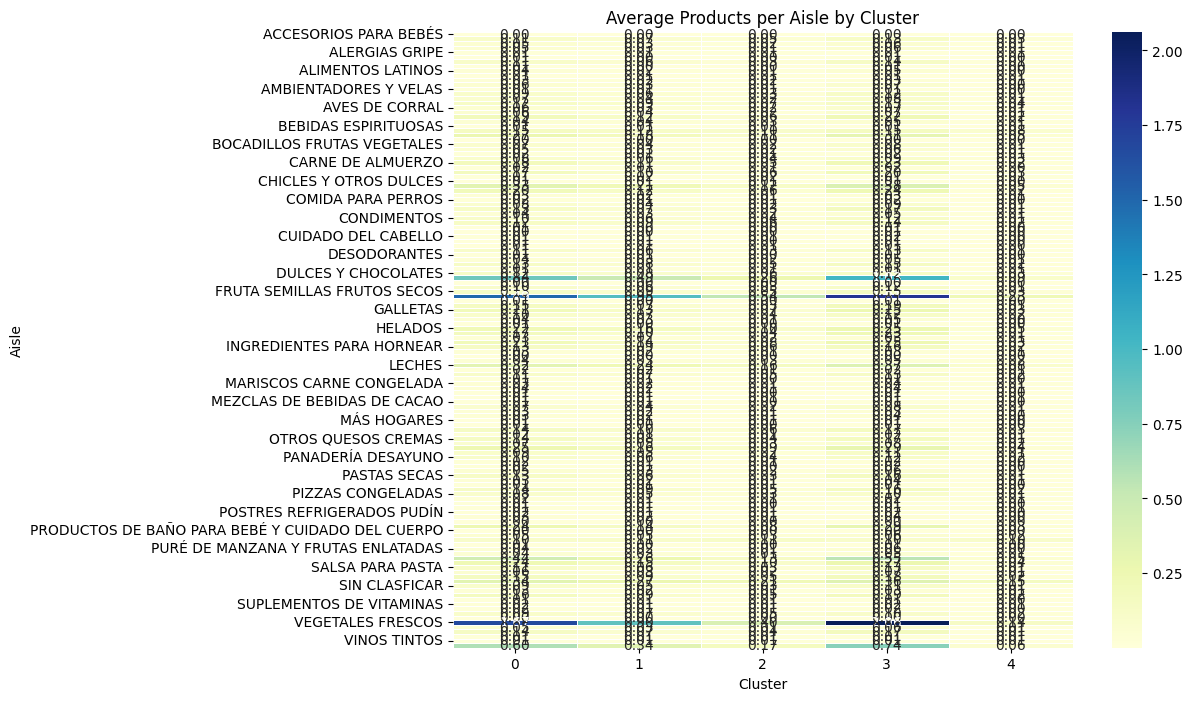

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(info_pasillo_por_cluster2, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)

# Add title and labels
plt.title('Average Products per Aisle by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Aisle')

# Show the heatmap
plt.show()

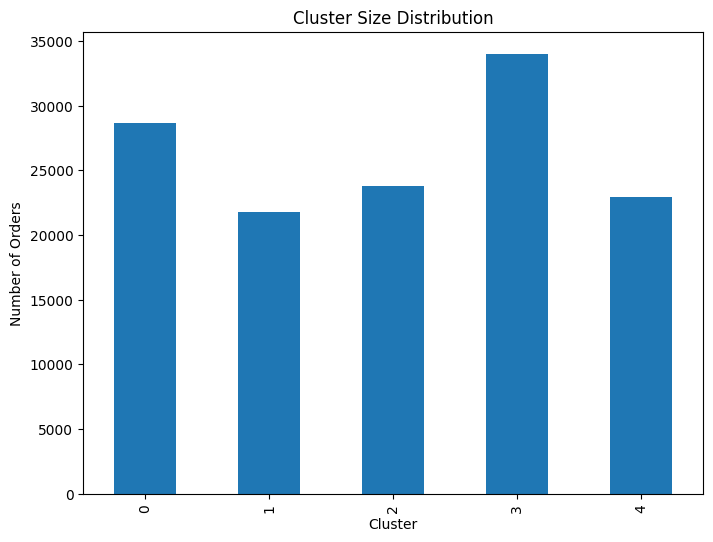

In [ ]:
# Plot the distribution of cluster sizes
plt.figure(figsize=(8, 6))
clusters2['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Orders')
plt.show()

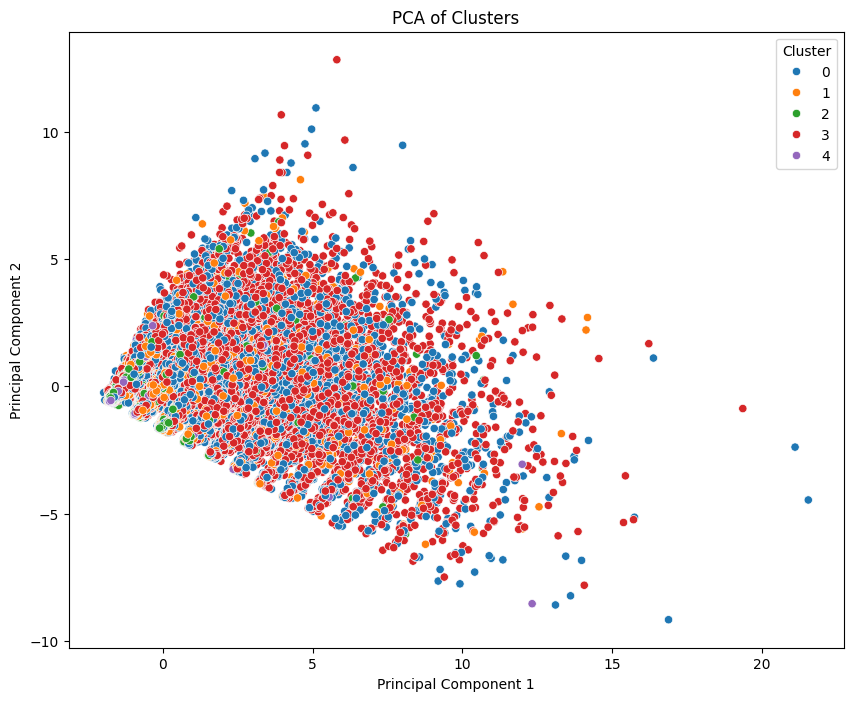

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clusters2.drop('cluster', axis=1))

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters2['cluster'].values

# Plot the PCA components with cluster coloring
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Get the loadings (coefficients of the principal components)
loadings = pca.components_.T

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=clusters2.drop('cluster', axis=1).columns)

# Display the loadings
loadings_df

,PC1,PC2
ACCESORIOS PARA BEBÉS,0.000353,0.000528
ACEITES VINAGRES,0.020445,-0.008629
ACEITUNAS ENCURTIDAS BIENES,0.009940,-0.002275
ADEREZOS PARA ENSALADAS Y CONDIMENTOS,0.007402,0.000036
ALERGIAS GRIPE,-0.001786,-0.000603
...,...,...
VEGETARIANA VEGANA CONGELADA,0.006391,0.001338
VERDURAS EN CONSERVA Y EN FRASCOS,0.037873,-0.021319
VINOS BLANCOS,-0.001640,-0.001337
VINOS TINTOS,-0.001749,-0.001688


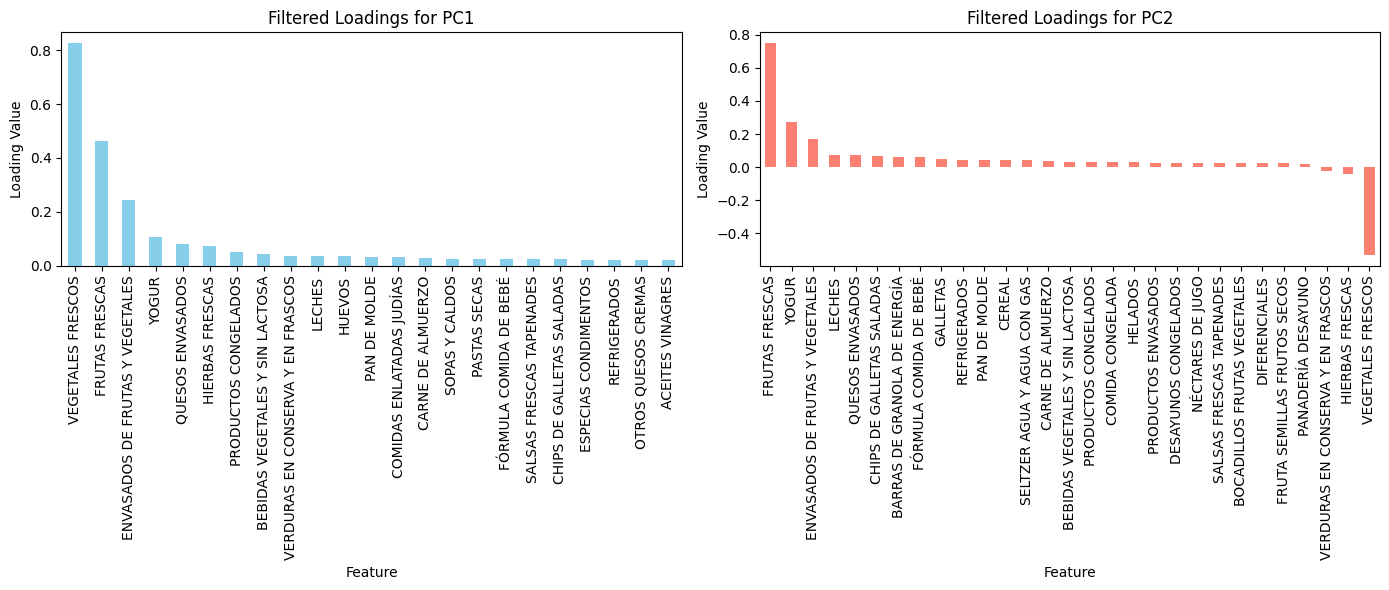

In [ ]:
# Filter the loadings to include only those greater than 0.1 or less than -0.1
filtered_loadings_PC1 = loadings_df[(loadings_df['PC1'] > 0.02) | (loadings_df['PC1'] < -0.02)]
filtered_loadings_PC2 = loadings_df[(loadings_df['PC2'] > 0.02) | (loadings_df['PC2'] < -0.02)]

# Plot the filtered loadings for PC1 and PC2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
filtered_loadings_PC1['PC1'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Filtered Loadings for PC1')
plt.ylabel('Loading Value')
plt.xlabel('Feature')

plt.subplot(1, 2, 2)
filtered_loadings_PC2['PC2'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Filtered Loadings for PC2')
plt.ylabel('Loading Value')
plt.xlabel('Feature')

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for each cluster
cluster_profiles = clusters2.groupby('cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Display the cluster profiles
cluster_profiles

ACCESORIOS PARA BEBÉS                          ACEITES VINAGRES  \
                         mean median       std min max             mean   
cluster                                                                   
0                    0.003388    0.0  0.058112   0   1         0.107276   
1                    0.001699    0.0  0.041180   0   1         0.068861   
2                    0.001051    0.0  0.032403   0   1         0.048390   
3                    0.003764    0.0  0.061717   0   2         0.125397   
4                    0.000392    0.0  0.023796   0   2         0.027491   

                                  ... VINOS TINTOS                           \
        median       std min max  ...         mean median       std min max   
cluster                           ...                                         
0          0.0  0.359691   0   5  ...     0.008803    0.0  0.123383   0   5   
1          0.0  0.283665   0   6  ...     0.009319    0.0  0.119511   0   4   
2          0.0  0.233004   0   3  ...     0.010973    0.0  0.144136   0   5   
3          0.0  0.385199   0   4  ...     0.009646    0.0  0.141917   0   9   
4          0.0  0.172334   0   3  ...     0.007799    0.0  0.105116   0   3   

            YOGUR                           
             mean median       std min max  
cluster                                     
0        0.604325    0.0  1.118826   0  26  
1        0.344994    0.0  0.803147   0  18  
2        0.168040    0.0  0.514876   0   8  
3        0.736325    0.0  1.229387   0  23  
4        0.059644    0.0  0.280460   0   8  

[5 rows x 670 columns]

In [ ]:
# Calculate the total number of products per order
clusters2['total_products'] = clusters2.drop('cluster', axis=1).sum(axis=1)

# Group by cluster and calculate the mean of total products
mean_total_products_per_cluster = clusters2.groupby('cluster')['total_products'].mean()

# Display the results
mean_total_products_per_cluster

cluster
0    14.392008
1     9.019694
2     5.202430
3    17.119486
4     2.411319
Name: total_products, dtype: float64

In [ ]:
def get_top_n_per_column(info_pasillo_por_cluster2, top_n=4):
    top_n_dict = {}
    for column in info_pasillo_por_cluster2.columns:
        sorted_column = info_pasillo_por_cluster2[column].sort_values(ascending=False).head(top_n)
        top_n_dict[column] = sorted_column
    return top_n_dict

# Get the top 4 values for each column
top_4_per_column = get_top_n_per_column(info_pasillo_por_cluster2, top_n=4)

# Display the top 4 values for each column
for column, top_values in top_4_per_column.items():
    print(f"Top 4 values for {column}:\n{top_values}\n")

Top 4 values for 0:
VEGETALES FRESCOS                    1.670591
FRUTAS FRESCAS                       1.493800
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.842247
YOGUR                                0.604325
Name: 0, dtype: float64

Top 4 values for 1:
FRUTAS FRESCAS                       0.951705
VEGETALES FRESCOS                    0.898453
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.494376
YOGUR                                0.344994
Name: 1, dtype: float64

Top 4 values for 2:
FRUTAS FRESCAS                       0.537543
VEGETALES FRESCOS                    0.398007
ENVASADOS ​​DE FRUTAS Y VEGETALES    0.261330
SELTZER AGUA Y AGUA CON GAS          0.213487
Name: 2, dtype: float64

Top 4 values for 3:
VEGETALES FRESCOS                    2.062581
FRUTAS FRESCAS                       1.810434
ENVASADOS ​​DE FRUTAS Y VEGETALES    1.025644
YOGUR                                0.736325
Name: 3, dtype: float64

Top 4 values for 4:
FRUTAS FRESCAS                 0.232562
SELTZER AGUA Y AGUA CON 

## 9. Merge cluster with final version

In [ ]:
#in case you accessing the google shared drive use this and discard the previous by adding a # before and deleting the # in the next line:
route = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/df_final_version.csv'
destination = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged'

In [ ]:
# Path to the CSV file
file_path = route

# Read the CSV file into a DataFrame
df3 = pd.read_csv(file_path)

df3.head(5)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento,incluido_orden_carrito_normalized,...,departamento_PRODUCTOS ENLATADOS,departamento_SIN CATALOGAR,total_orders_per_product,total_reorders_per_product,reorder_rate_per_product,order_size,position_in_order,product_popularity_in_department,product_popularity_in_aisle,cluster
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS,0.000000,...,0.0,0.0,0.000374,0.000423,0.875000,0.076923,0.000000,0.000374,0.000374,3
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS,0.012821,...,0.0,0.0,0.007637,0.006463,0.743056,0.076923,0.001832,0.007637,0.007637,3
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.025641,...,0.0,0.0,0.056662,0.034366,0.535782,0.076923,0.003663,0.056662,0.056662,3
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.038462,...,0.0,0.0,0.128812,0.103219,0.708247,0.076923,0.005495,0.128812,0.128812,3
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS,0.051282,...,1.0,0.0,0.001228,0.000604,0.416667,0.076923,0.007326,0.001228,0.001228,3


In [ ]:
# Reset the index of the clusters dataframe to prepare for the merge
clusters2 = clusters2.reset_index()

# Select only the necessary columns
clusters_to_merge2 = clusters2[['id_orden', 'cluster']]

In [ ]:
clusters_to_merge2.columns = ['id_orden', 'cluster2']

In [ ]:
# Merge df with clusters_to_merge
df3 = df3.merge(clusters_to_merge2, on='id_orden', how='left')

In [ ]:
df3

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento,incluido_orden_carrito_normalized,...,departamento_SIN CATALOGAR,total_orders_per_product,total_reorders_per_product,reorder_rate_per_product,order_size,position_in_order,product_popularity_in_department,product_popularity_in_aisle,cluster,cluster2
0,1,49302,1,1,EL YOGUR DE BULGARIA,120.0,16.0,YOGUR,HUEVOS Y LÁCTEOS,0.000000,...,0.0,0.000374,0.000423,0.875000,0.076923,0.000000,0.000374,0.000374,3,1
1,1,11109,2,1,4% ORGÁNICO QUESO GRASA DE LECHE LECHE ENTERA ...,108.0,16.0,OTROS QUESOS CREMAS,HUEVOS Y LÁCTEOS,0.012821,...,0.0,0.007637,0.006463,0.743056,0.076923,0.001832,0.007637,0.007637,3,1
2,1,10246,3,0,CORAZONES DE APIO ORGÁNICOS,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.025641,...,0.0,0.056662,0.034366,0.535782,0.076923,0.003663,0.056662,0.056662,3,1
3,1,49683,4,0,KIRBY PEPINO,83.0,4.0,VEGETALES FRESCOS,FRUTAS Y VERDURAS,0.038462,...,0.0,0.128812,0.103219,0.708247,0.076923,0.005495,0.128812,0.128812,3,1
4,1,43633,5,1,LAS SARDINAS LIGERAMENTE AHUMADO EN ACEITE DE ...,95.0,15.0,MARISCOS CARNE ENLATADA,PRODUCTOS ENLATADOS,0.051282,...,0.0,0.001228,0.000604,0.416667,0.076923,0.007326,0.001228,0.001228,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369694,3421063,49235,1,1,ORGÁNICA DE HALF & HALF,53.0,16.0,CREMA,HUEVOS Y LÁCTEOS,0.000000,...,0.0,0.141255,0.128586,0.804611,0.038462,0.000000,0.141255,0.141255,0,2
1369695,3421063,13565,2,1,SIN SAL AÑADIDA SIN GLUTEN BLUE CHIPS HECHO CO...,107.0,19.0,CHIPS DE GALLETAS SALADAS,MERIENDAS,0.012821,...,0.0,0.004272,0.002718,0.555556,0.038462,0.003205,0.004272,0.004272,0,2
1369696,3421063,14233,3,1,NATURAL ARTESIANO DE AGUA,115.0,7.0,SELTZER AGUA Y AGUA CON GAS,BEBIDAS,0.025641,...,0.0,0.029533,0.026273,0.785199,0.038462,0.006410,0.029533,0.029533,0,2
1369697,3421063,35548,4,1,PAPAS DOBLEMENTE COCIDAS,13.0,20.0,COMIDAS PREPARADAS,FIAMBRES,0.038462,...,0.0,0.000908,0.000604,0.555556,0.038462,0.009615,0.000908,0.000908,0,2


In [ ]:
df3['id_orden'].nunique()

131153

# **6. export df_final_version with clusters**

In [ ]:
# Define the directory path for the cleaned data folder
cleaned_data_folder = destination

# Check if the directory exists, if not, create it
if not os.path.exists(cleaned_data_folder):
    os.makedirs(cleaned_data_folder)

# Define the file path for the CSV file
csv_file_path = os.path.join(cleaned_data_folder, 'df_final_version.csv')

# Export the cleaned DataFrame to a CSV file
df3.to_csv(csv_file_path, index=False)

# Print confirmation message
print(f"Cleaned DataFrame exported to: {csv_file_path}")

Cleaned DataFrame exported to: /content/drive/My Drive/CAPSTONE/Dataset_cleaned_merged/df_final_version.csv
